<a href="https://colab.research.google.com/github/Abinaya9705/Naive-Bayes-Project/blob/main/Sentiment_analysis_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Data
data = pd.DataFrame({
    'message': ["I love this movie", "This place is terrible", "The food was amazing",
                "I don't like the service", "What a fantastic experience", "I will never come back"],
    'label': [1, 0, 1, 0, 1, 0]
})
print('The dimensions of the dataset:', data.shape)
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)
print('\nFeatures (X):\n', data['message'].to_string(index=False))
print('\nLabels (y):\n', data['label'].to_string(index=False))
print('\nTest data shape:', X_test.shape, '\nTrain data shape:', X_train.shape)

# Vectorization
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
print('\nFeature names:', vectorizer.get_feature_names_out())

# Document-term matrix
df = pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names_out())
print('\nDocument-term matrix (train data):\n', df.to_string(index=False))

The dimensions of the dataset: (6, 2)

Features (X):
           I love this movie
     This place is terrible
       The food was amazing
   I don't like the service
What a fantastic experience
     I will never come back

Labels (y):
 1
0
1
0
1
0

Test data shape: (2,) 
Train data shape: (4,)

Feature names: ['amazing' 'back' 'come' 'don' 'experience' 'fantastic' 'food' 'like'
 'never' 'service' 'the' 'was' 'what' 'will']

Document-term matrix (train data):
  amazing  back  come  don  experience  fantastic  food  like  never  service  the  was  what  will
       0     1     1    0           0          0     0     0      1        0    0    0     0     1
       1     0     0    0           0          0     1     0      0        0    1    1     0     0
       0     0     0    0           1          1     0     0      0        0    0    0     1     0
       0     0     0    1           0          0     0     1      0        1    1    0     0     0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create and train the model
model = LogisticRegression()
model.fit(X_train_dtm, y_train)

# 2. Make predictions on the test data
X_test_dtm = vectorizer.transform(X_test)  # Vectorize test data
y_pred = model.predict(X_test_dtm)

# 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


In [3]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# Example usage to predict sentiment for a new message
new_message = ["This product is amazing!"]
new_message_dtm = vectorizer.transform(new_message)
predicted_sentiment = model.predict(new_message_dtm)

if predicted_sentiment[0] == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")

Positive sentiment


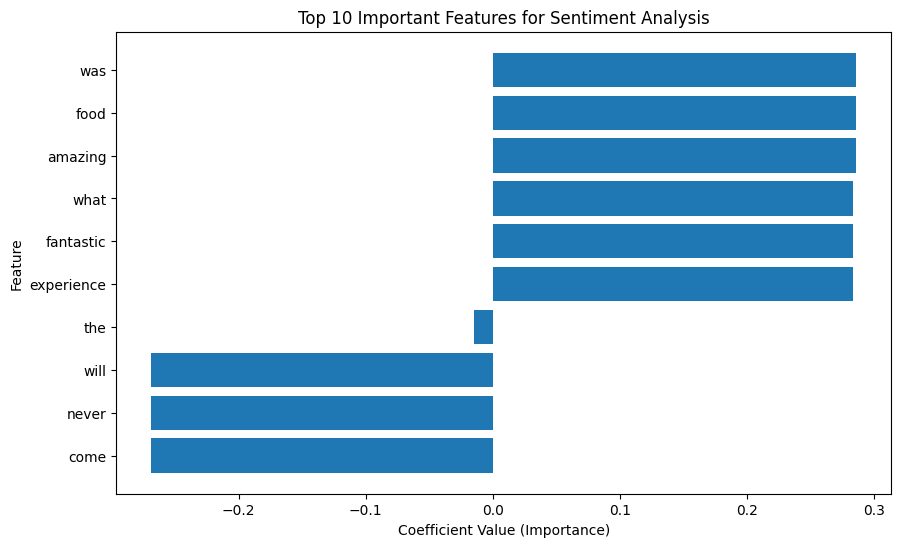

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients)
feature_importance = model.coef_[0]

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot top N features
N = 10  # Number of top features to display
top_features_idx = sorted_idx[-N:]
top_features = [feature_names[i] for i in top_features_idx]
top_importance = [feature_importance[i] for i in top_features_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance)
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.title("Top {} Important Features for Sentiment Analysis".format(N))
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

# Calculate class weights
class_weights = {0: 1, 1: 2}  # Example: Give class 1 double the weight

# Create and train the model with class weights
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train_dtm, y_train)

# ... (rest of the code remains the same)

LogisticRegression(class_weight={0: 1, 1: 2})

In [7]:
import nltk
from nltk.sentiment.util import mark_negation

nltk.download('punkt') # Download necessary resource if not already present

# Example usage
message = "This movie is not good."
negated_message = mark_negation(message.split())
print(negated_message)  # Output: ['This', 'movie', 'is', 'not_good', '.']

# Incorporate negation handling in vectorization
vectorizer = CountVectorizer(tokenizer=lambda text: mark_negation(text.split()))
# ... (rest of the code remains the same)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'movie', 'is', 'not', 'good._NEG']


In [10]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet') # Download necessary resource if not already present
nltk.download('omw-1.4') # Download necessary resource if not already present

# Initialize stemmer or lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example usage with stemming
message = "This movie is amazing!"
stemmed_words = [stemmer.stem(word) for word in message.split()]
print(stemmed_words)  # Output: ['thi', 'movi', 'is', 'amaz!']
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet') # Download necessary resource if not already present
nltk.download('omw-1.4') # Download necessary resource if not already present

# Initialize stemmer or lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example usage with stemming
message = "This movie is amazing!"
stemmed_words = [stemmer.stem(word) for word in message.split()]
print(stemmed_words)  # Output: ['thi', 'movi', 'is', 'amaz!']

# Example usage with lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in message.split()]
print(lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['thi', 'movi', 'is', 'amazing!']
['thi', 'movi', 'is', 'amazing!']


[nltk_data]   Package omw-1.4 is already up-to-date!


['This', 'movie', 'is', 'amazing!']


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create GridSearchCV object
# Reduced cv to 2, which is less than the number of samples (4)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_dtm, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.5


In [14]:
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier's accuracy

In [15]:
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

# Visualize the decision boundaries (for the first two features)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z

Accuracy: 0.9777777777777777


array([0, 0, 0, ..., 2, 2, 2])

Accuracy: 0.9777777777777777


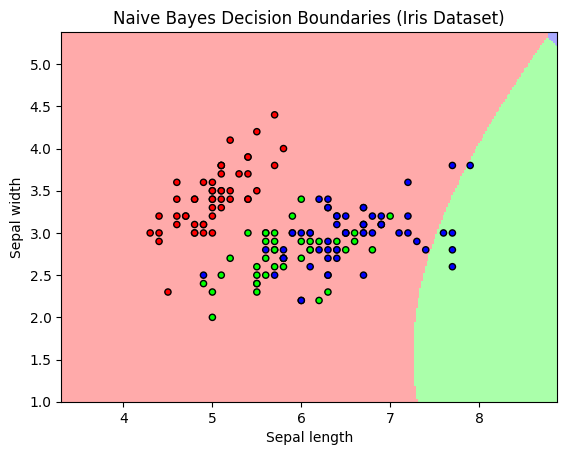

Predicted class for new data point: setosa
Probabilities for each class: [[1.00000000e+00 7.82732978e-17 1.66528708e-24]]


In [16]:
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

# Visualize the decision boundaries (for the first two features)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes Decision Boundaries (Iris Dataset)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

# --- Practical Examples ---

# 1. Predicting the class of a new data point
new_data_point = [[5.1, 3.5, 1.4, 0.2]]  # Example data point
predicted_class = gnb.predict(new_data_point)
print(f"Predicted class for new data point: {iris.target_names[predicted_class[0]]}")

# 2. Getting the probability estimates for each class
probabilities = gnb.predict_proba(new_data_point)
print(f"Probabilities for each class: {probabilities}")

# --- Enhancements ---

# 1. Using different Naive Bayes variants
#   - For categorical features: from sklearn.naive_bayes import MultinomialNB
#   - For text classification: from sklearn.naive_bayes import BernoulliNB

# 2. Handling missing values in the data
#   - Use imputation techniques (e.g., from sklearn.impute import SimpleImputer)

# 3. Feature scaling (if necessary)
#   - Use standardization or normalization (e.g., from sklearn.preprocessing import StandardScaler)

Accuracy: 0.9777777777777777


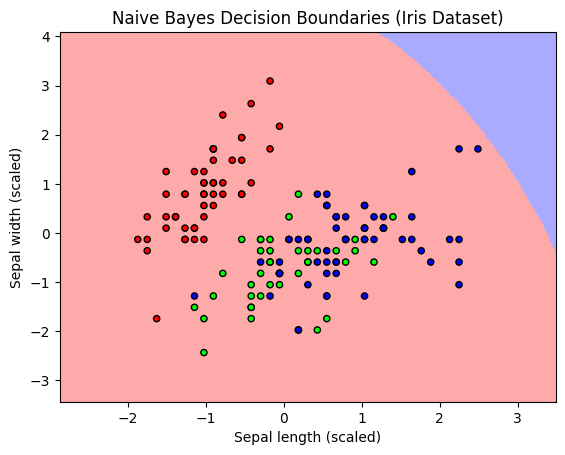

Predicted class for new data point: setosa
Probabilities for each class: [[1.00000000e+00 1.87706077e-16 3.99350264e-24]]


In [17]:
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import StandardScaler # For feature scaling

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# --- Handling Missing Values (Example) ---
# Introduce some missing values (NaN) for demonstration
X[5, 2] = np.nan  # Missing value in the 3rd feature of the 6th sample

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# --- Feature Scaling (Example) ---
# Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

# --- Visualize (only first two features for simplicity) ---
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Note: Using only first two features for visualization
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes Decision Boundaries (Iris Dataset)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()

# --- Practical Examples ---

# 1. Predicting the class of a new data point (scaled)
new_data_point = scaler.transform([[5.1, 3.5, 1.4, 0.2]])  # Scale the new data point
predicted_class = gnb.predict(new_data_point)
print(f"Predicted class for new data point: {iris.target_names[predicted_class[0]]}")

# 2. Getting the probability estimates for each class
probabilities = gnb.predict_proba(new_data_point)
print(f"Probabilities for each class: {probabilities}")

In [19]:
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Iris Dataset (GaussianNB) ---
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Preprocessing (handling missing values, feature scaling)
imputer = SimpleImputer(strategy='mean')
!pip install scikit-learn matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Iris Dataset (GaussianNB) ---
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Preprocessing (handling missing values, feature scaling)
imputer = SimpleImputer(strategy='mean')
X_iris = imputer.fit_transform(X_iris)
scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)

In [21]:
!pip install scikit-learn matplotlib seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

# ... (Iris dataset code remains the same) ...

# --- 20 Newsgroups Dataset (MultinomialNB with GridSearchCV) ---
# ... (load and preprocess data as before) ...
!pip install scikit-learn matplotlib seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

# ... (Iris dataset code remains the same) ...

# --- 20 Newsgroups Dataset (MultinomialNB with GridSearchCV) ---
# ... (load and preprocess data as before) ...

# Parameter grid for MultinomialNB
param_grid = {}